# Pymaceuticals Inc.
---

### Analysis

Observation #1: There were more male mouses than female mouses.
Observation #2: Capomulin and Ramicane had the lowest tumor volume.
Observation #3: With the linear regression line trending upward along with weight, we can conclude that there is a positive correlation between the mouse weight and the volume of the tumor.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID")
df.head()

# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [3]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
df.groupby(["Mouse ID", "Timepoint"]).size().sort_values()

Mouse ID  Timepoint
a203      0            1
q633      5            1
          0            1
q610      35           1
          30           1
                      ..
g989      20           2
          5            2
          10           2
          0            2
          15           2
Length: 1888, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
mask = df["Mouse ID"] == "g989"
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = df["Mouse ID"] != "g989"
df2 = df.loc[mask].reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [7]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
average_tumor = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
average_tumor


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df2.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

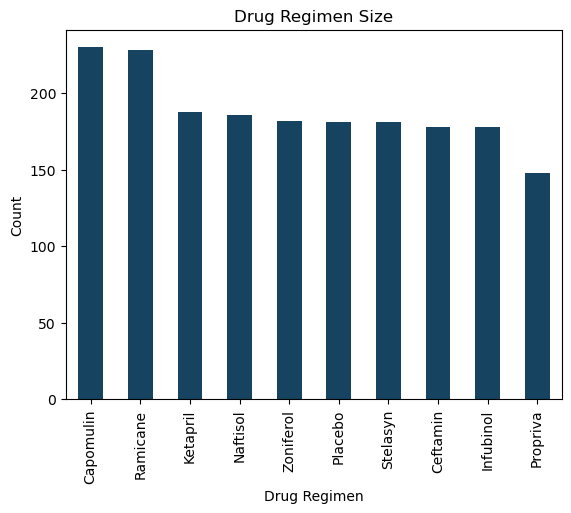

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df2.groupby("Drug Regimen").size().sort_values(ascending=False).plot(kind="bar", title="Drug Regimen Size", ylabel="Count", color="#154360")
plt.show()

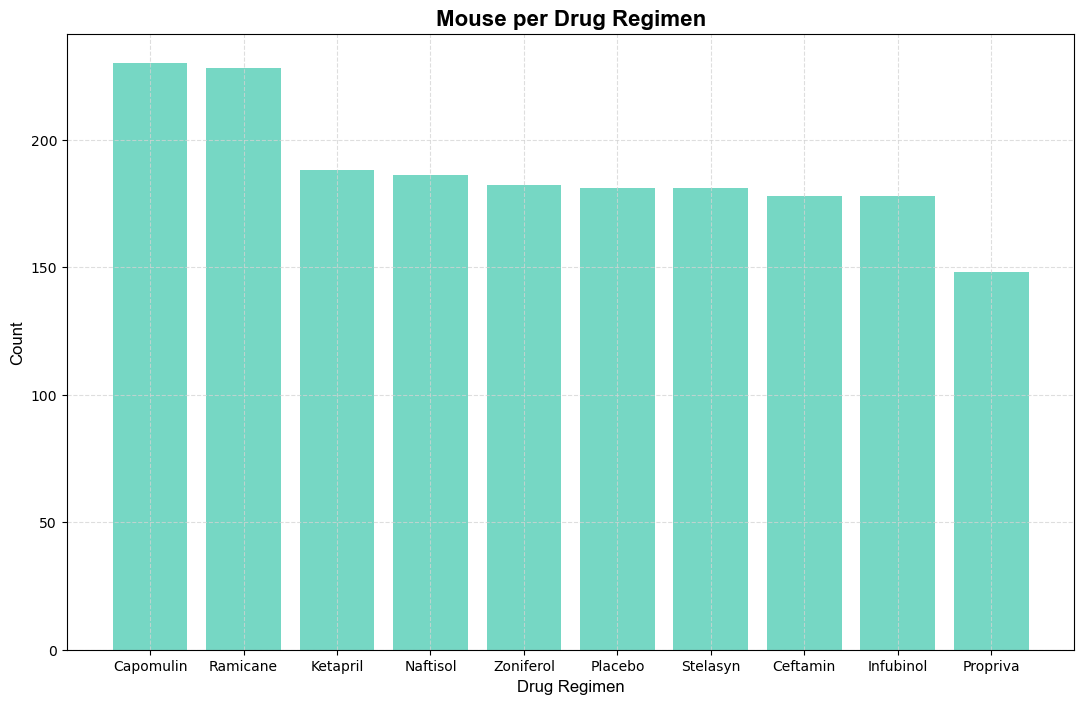

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

data = df2.groupby("Drug Regimen").size().sort_values(ascending=False)

# Change Canvas Size
plt.figure(figsize=(13, 8))

# Create a basic plot
plt.bar(data.index, data.values, color="#76d7c4", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Drug Regimen", fontfamily="Arial", fontsize=12)
plt.ylabel("Count", fontfamily="Arial", fontsize=12)
plt.title("Mouse per Drug Regimen", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [12]:
df2.Sex.value_counts()

Sex
Male      958
Female    922
Name: count, dtype: int64

In [13]:
958/1880

0.5095744680851064

In [14]:
922/1880

0.49042553191489363

In [15]:
Mousedata = df2[["Mouse ID", "Sex"]].drop_duplicates()
Mousedata.shape

(248, 2)

In [16]:
Mousedata.Sex.value_counts()

Sex
Male      125
Female    123
Name: count, dtype: int64

In [17]:
125/248

0.5040322580645161

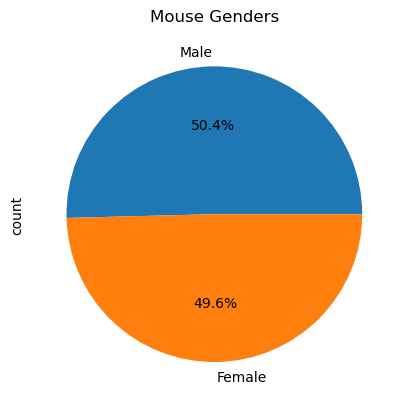

In [18]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

data = Mousedata.Sex.value_counts()

# Make the pie chart
data.plot(kind="pie", title="Mouse Genders", autopct="%1.1f%%")
plt.show()

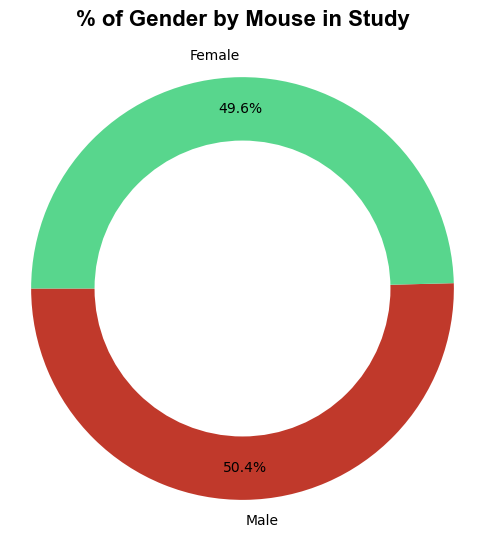

In [21]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
#Better one with colors

# Get the unique mice with their gender


# Make the pie chart
data = Mousedata.Sex.value_counts()

# Change Canvas Size
plt.figure(figsize=(6, 6))

# Create a basic plot
plt.pie(data.values, labels=data.index, colors=["#c0392b", "#58d68d"], autopct="%1.1f%%", shadow=False, startangle=180, pctdistance=0.85)

# Customizations
# DONUT
centre_circle = plt.Circle((0,0), 0.70, fc='white')  # Adjust 0.70 for hole size
plt.gca().add_artist(centre_circle)

# Change colors
# Add in reference lines
# Add Labels/Title
plt.title(f"% of Gender by Mouse in Study\n", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.axis("equal")

# Show/Save the Graph
plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_time = df2.groupby("Mouse ID").Timepoint.max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df3 = pd.merge(greatest_time, df2, on=["Mouse ID", "Timepoint"], how="left")

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mask = df3["Drug Regimen"].isin(treatments)
df3 = df3.loc[mask].reset_index(drop=True)
df3

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
# List of treatments
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
df3 = df3[df3['Drug Regimen'].isin(treatments)]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Dictionary to store outlier data
outlier_dict = {}

for treatment in treatments:
    # Extract tumor volume data for the current drug
    drug_data = df3[df3['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Append to the average_tumor list
    tumor_volumes.append(drug_data.mean())  # Store the average
    
    # Calculate the IQR
    q1 = drug_data.quantile(0.25)
    q3 = drug_data.quantile(0.75)
    iqr = q3 - q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    # Find outliers
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    # Store the outliers in the dictionary
    outlier_dict[treatment] = outliers.tolist()
    
    print(f"{treatment} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [32]:
tumor_volumes

[36.6675677192, 36.1913904284, 58.1782457852, 57.753976825200006]

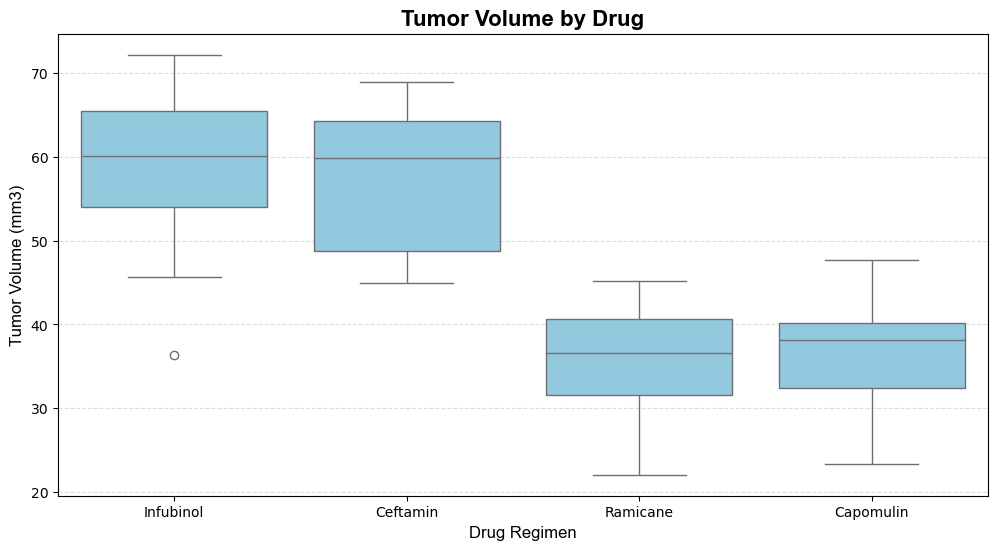

In [33]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.boxplot(data=df3, y="Tumor Volume (mm3)", x="Drug Regimen", color="skyblue")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Drug Regimen", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Tumor Volume by Drug", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)
# plt.xlim(0,20)

# Show/Save the Graph
plt.show()

## Line and Scatter Plots

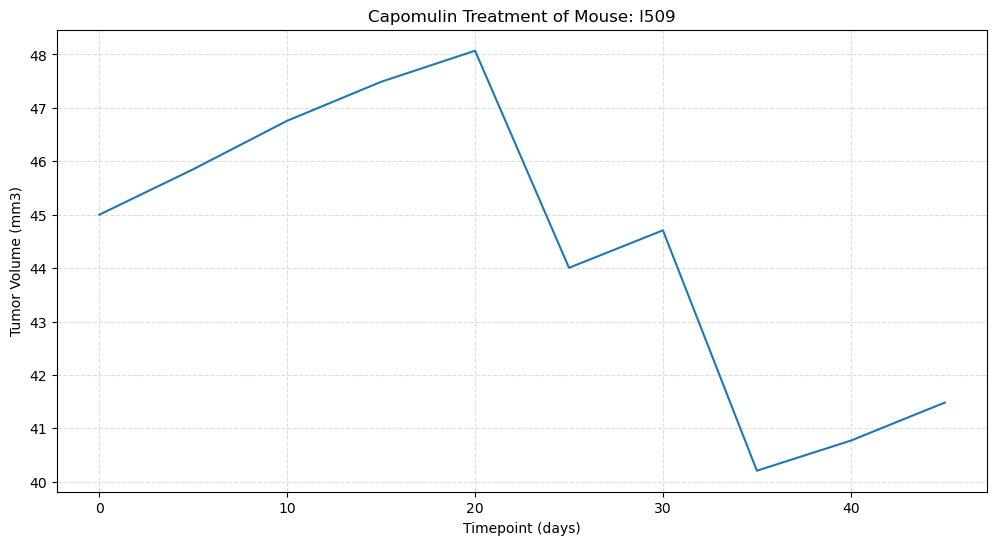

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = "l509"

df4 = df2.loc[df2["Mouse ID"] == mouse].sort_values(by="Timepoint", ascending=True)

# df4.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)")

# Change Canvas Size
plt.figure(figsize=(12, 6))


# Create a basic plot
plt.plot(df4.Timepoint, df4["Tumor Volume (mm3)"])

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment of Mouse: {mouse}")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
regimen = "Capomulin"

df5 = df2.loc[df2["Drug Regimen"] == regimen]
df6 = df5.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"}).reset_index()
df6.head()

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22.0
1,b742,40.083699,21.0
2,f966,36.505973,17.0
3,g288,41.990097,19.0
4,g316,44.613344,22.0


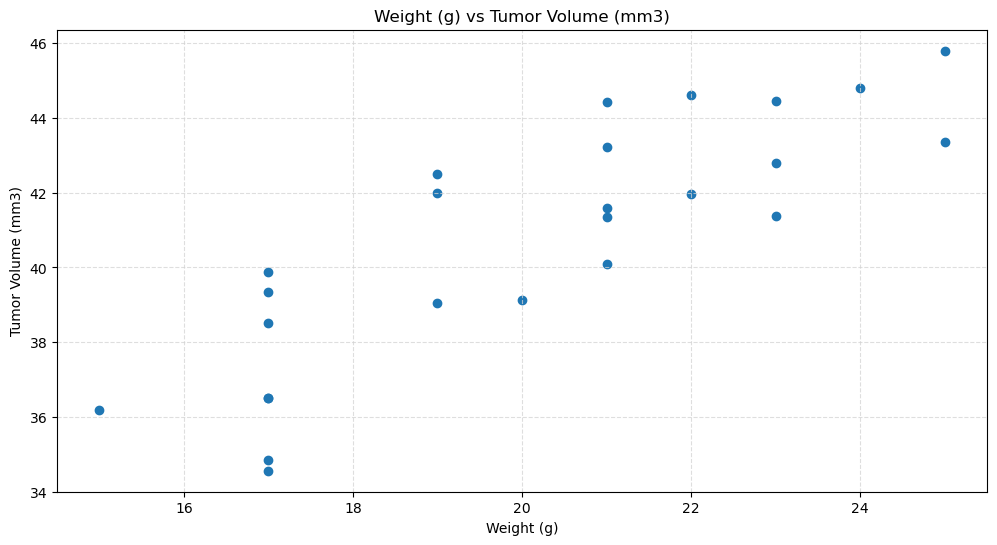

In [36]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
 # Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df6["Weight (g)"], df6["Tumor Volume (mm3)"])

# Add Labels/Title
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight (g) vs Tumor Volume (mm3)")


# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

## Correlation and Regression

In [37]:
# Calculate the correlation coefficient and a linear regression model
x_values = df6["Weight (g)"]
y_values = df6["Tumor Volume (mm3)"]

# do regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept # these are the points/predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.95x + 21.55


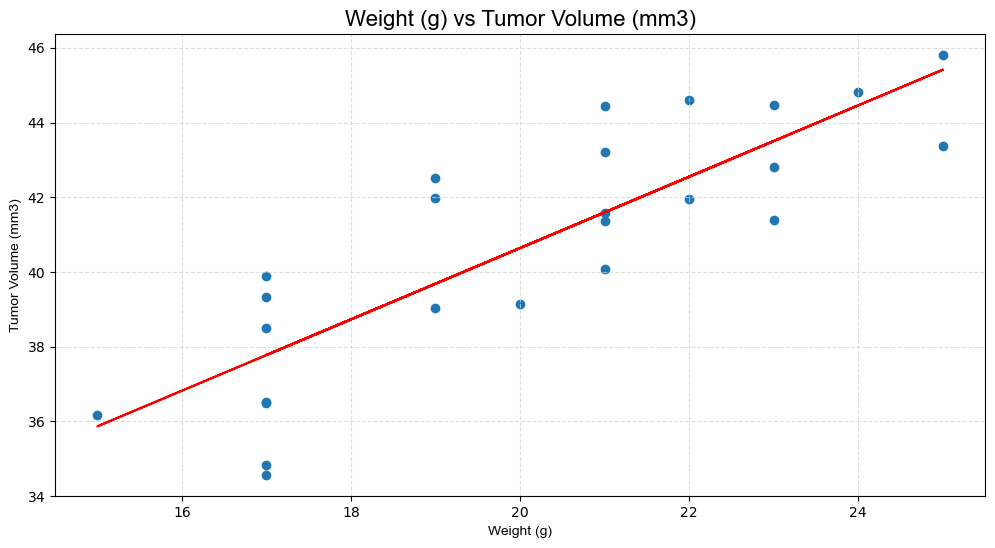

In [38]:
# Group by Mouse ID to calculate the average tumor volume for each mouse

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df6["Weight (g)"], df6["Tumor Volume (mm3)"])
plt.plot(df6["Weight (g)"], regress_values, color="red") # the regression line

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Weight (g)", fontfamily="Arial")
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial")
plt.title("Weight (g) vs Tumor Volume (mm3)", fontsize=16, fontfamily="Arial")

# # Set X/Y Limits
# plt.ylim(0, 90)
# plt.xlim(-2, 75)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Annotate
plt.annotate(line_eq, (20, 30), fontsize=15, color="black")

# Show/Save the Graph
plt.show()